<a href="https://colab.research.google.com/github/NandiniMehta0603/Parameter-Optimization-of-SVM/blob/main/Parameter_Optimization_of_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv("/content/drive/MyDrive/ml/accelerometer df.csv",names=['target','speed percentage','x','y','z'])

In [4]:
df.head()

,target,speed percentage,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [5]:
# X = dfi.iloc[:, :-1].values
#   y = dfi.iloc[:, -1].values
#   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)

max_acc = 0
acc_list = []
param_list = []
for i in range(10):
    sample_df = df.sample(frac=0.40, replace=False)
    x_train, x_test, y_train, y_test = train_test_split(sample_df.drop('target', axis=1), sample_df.target, test_size=0.3, random_state=42, stratify=sample_df.target)

    x_train = StandardScaler().fit_transform(x_train)
    param_grid = { 
                'C':[0.1, 0.5, 1, 2, 3],
                'kernel':['rbf', 'poly', 'sigmoid', 'linear'],
                'degree':[1, 2, 3, 4],
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
                }
    
    grid = GridSearchCV(SVC(max_iter=100), param_grid)
    grid.fit(x_train, y_train)  
    y_pred = grid.predict(x_test)
    print(grid.best_params_)
    print('Sample {}'.format(i+1))
    print('Accuracy: {}\n'.format(accuracy_score(y_test, y_pred))) 
    
    acc_list.append(accuracy_score(y_test, y_pred))
    param_list.append(grid.best_params_)
    
    if accuracy_score(y_test, y_pred) > max_acc:
        max_acc = accuracy_score(y_test, y_pred)
        best_params = grid.best_params_
        best_model = grid.best_estimator_
        best_sample_df = sample_df

{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 1
Accuracy: 0.3309368191721133

{'C': 3, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Sample 2
Accuracy: 0.34809368191721135

{'C': 0.1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
Sample 3
Accuracy: 0.3340958605664488

{'C': 3, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}
Sample 4
Accuracy: 0.33126361655773423

{'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
Sample 5
Accuracy: 0.3397058823529412

{'C': 2, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
Sample 6
Accuracy: 0.3449891067538126

{'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
Sample 7
Accuracy: 0.3803376906318083

{'C': 3, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}
Sample 8
Accuracy: 0.3332788671023965

{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 9
Accuracy: 0.33736383442265794

{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}
Sample 10
Accuracy: 0.33344226579520697



In [6]:
print(acc_list)
print(param_list)

[0.3309368191721133, 0.34809368191721135, 0.3340958605664488, 0.33126361655773423, 0.3397058823529412, 0.3449891067538126, 0.3803376906318083, 0.3332788671023965, 0.33736383442265794, 0.33344226579520697]
[{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 3, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}, {'C': 0.1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}, {'C': 3, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}, {'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}, {'C': 2, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}, {'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}, {'C': 3, 'degree': 2, 'gamma': 1, 'kernel': 'poly'}, {'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}, {'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': 'rbf'}]


In [7]:
final_df = pd.DataFrame(data=[acc_list, param_list], index=['Accuracy', 'Parameters']).T
final_df

,Accuracy,Parameters
0,0.330937,"{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
1,0.348094,"{'C': 3, 'degree': 2, 'gamma': 1, 'kernel': 'p..."
2,0.334096,"{'C': 0.1, 'degree': 2, 'gamma': 0.01, 'kernel..."
3,0.331264,"{'C': 3, 'degree': 1, 'gamma': 1, 'kernel': 'r..."
4,0.339706,"{'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel':..."
5,0.344989,"{'C': 2, 'degree': 2, 'gamma': 0.01, 'kernel':..."
6,0.380338,"{'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel':..."
7,0.333279,"{'C': 3, 'degree': 2, 'gamma': 1, 'kernel': 'p..."
8,0.337364,"{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': ..."
9,0.333442,"{'C': 3, 'degree': 1, 'gamma': 0.1, 'kernel': ..."


In [8]:
print(max_acc)
print(best_params)
print(best_model)
best_sample_df.head()

0.3803376906318083
{'C': 1, 'degree': 2, 'gamma': 0.01, 'kernel': 'poly'}
SVC(C=1, degree=2, gamma=0.01, kernel='poly', max_iter=100)


,target,speed percentage,x,y,z
130537,3,65,0.973,0.039,-0.113
146916,3,90,1.234,-0.184,-0.191
16038,1,45,1.074,-0.438,0.023
38988,1,80,1.590,-0.332,-0.195
73881,2,55,0.984,0.043,-0.426


In [9]:
iterations = list()
acc_list = list()
x_train, x_test, y_train, y_test = train_test_split(best_sample_df.drop('target', axis=1), best_sample_df.target, test_size=0.3, random_state=42, stratify=best_sample_df.target)
x_train = StandardScaler().fit_transform(x_train)

for i in range(100):
    x = i+1
    svm = SVC(C=1, degree=2, gamma=0.01, kernel='poly', max_iter=x)
    svm.fit(x_train, y_train)
    y_pred = svm.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    acc_list.append(accuracy)
    iterations.append(x)

In [10]:
import numpy as np
iterations = np.array(iterations)
acc_list = np.array(acc_list)

In [11]:
print(iterations.shape)
print(acc_list.shape)

(100,)
(100,)


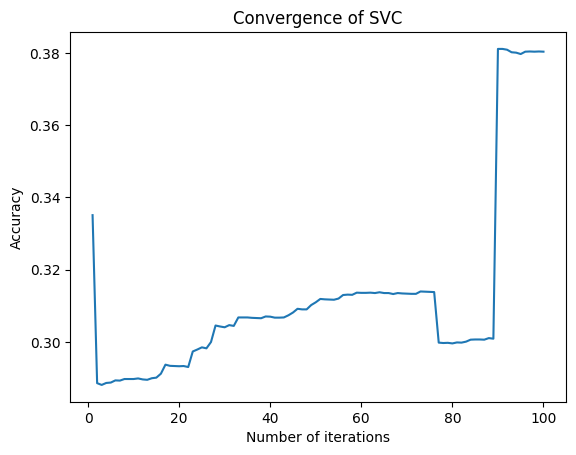

In [12]:
plt.plot(iterations, acc_list)
plt.xlabel('Number of iterations')
plt.ylabel('Accuracy')
plt.title('Convergence of SVC')
plt.show()